In [208]:
from sklearn.datasets import load_iris
from math import exp
from math import log
import os

Utility Functions

In [209]:
#Generator
def zip(*args):
    # warn('If lengths are not equal, some elements may be skipped')
    i = 0
    # print(args[0])
    while i < len(args[0]):
        yield [args[j][i] for j in range(len(args))]
        i += 1

def mean(X: list):
    #X: dim-2
    N = len(X) * len(X[0]) 
    return sum([sum(xrow) for xrow in X])/N

def std(X: list): 
    #X: dim-2
    N = len(X) * len(X[0]) 
    m = sum([sum(xrow) for xrow in X])/N
    EX2 = [[(x - m) ** 2 for x in xrow] for xrow in X]
    return (sum([sum(xrow) for xrow in EX2])/N) ** 0.5

def scale(X: list):
    #X dim:2
    N = len(X) * len(X[0])
    m = mean(X)
    s = std(X)
    X_scaled = [[(x - m)/s for x in xrow] for xrow in X]
    return X_scaled
        
#Generates random numbers greater than equal to zero
def random(stop):
    s = os.urandom(4)
    if stop != 0:
        return (s[0] * s[1]) % stop
    else:
        try:
            raise RangeError('Range variables are not proper.')
        except RangeError:
            print('Generating random number')
            if s[2] != 0:
                return (s[0]* s[1]) % s[2]
            else:
                return random(42)

def shuffle(X: list, Y: list):
    for i in range(len(X)-1, 0, -1): 
        # Pick a random index from 0 to i  
        j = random(i + 1)  
        # Swap arr[i] with the element at random index  
        X[i], X[j] = X[j], X[i]  
        Y[i], Y[j] = Y[j], Y[i]  

def train_test_splitter(X: list, Y: list, train_size: float):
    #train_size range:0 to 1 
    if len(X) != len(Y):
        raise Exception('Train data and labels not of the same size')
    shuffle(X, Y)
    split = round(len(X) * train_size)
    X_train = X[:split]
    Y_train = Y[:split]
    X_test = X[split:]
    Y_test = Y[split:]
    return X_train, X_test, Y_train, Y_test


def cross_entropy_perceptron(x: list, y: list):
    #x: List of shape (N, h)
    #y: List of shape (N, h)
    #out: List of shape (N, 1)
    loss_row = []
    for xrow, yrow in zip(x, y):
        logyrow = [-log(a) for a in yrow]
        XEntr = [a * b for a,b in zip(xrow, logyrow)]
        k = 0.
        for i in XEntr:
            if i > 0.:
                k = i
        loss_row.append(k)
    return loss_row

def update_probs(x: list, y: list):
    #x: List of shape (N, h)
    #y: List of shape (N, h)
    #out: List of shape (N, h)
    out = []
    store = []
    for xrow, yrow in zip(x, y):
        uprbs = [1-b if a == 1 else -b for a,b in zip(xrow, yrow)]
        out.append(uprbs)
    return out
    
# def dotmv(x: list , y: list):
#     #x: List of shape (j, k)
#     #y: List of shape (j)
#     #out: List of shape (k)
#     out = []
#     if len(x) != len(y):
#         raise Exception('Number of rows of x should be same as number of elements in y')
#     for itr1 in range(len(x[0])):
#         sum = 0
#         for itr2 in range(len(x)):
#             sum += x[itr2][itr1] * y[itr2]
#         out.append(sum)
#     return out

def scalar_mult_mat(x: list or int or float, y: list):
    #x: List of shape (j)
    #y: List of shape (j, k) or(j)
    #out: List of shape (j, k) or (j)
    out = []
    if type(x) == int or type(x) == float:
        if type(y[0]) == list:
            return [[x * a for a in yrow] for yrow in y]
        elif type(y[0]) == int or type(y[0]) == float:
            return [x * a for a in y]
    elif type(x) == list:
        if type(y[0]) == list:
            return [[a * b for a,b in zip(x, yrow)] for yrow in y]
        elif type(y[0]) == int or type(y[0]) == float:
            return [[e * p for p in x] for e in y]

def transpose(x: list):
    return [list(x) for x in zip(*result)]

def broadcast_sum(x: list, y: int):
    #x: List of shape (k)
    #y: integer
    #out: List of shape (k)
    return [i + y for i in x]
    
def matrix_mul(x: list, y: list):
    #x and y are of same sizes
    y_t = [a for a in zip(*y)]
    result = [[sum(a * b for a, b in zip(x_row, y_col))  
                        for y_col in y_t] 
                                for x_row in x] 
    return result

def matrix_sum(x: list, y: list):
    #x and y are of same sizes
    try:
        if len(x) != len(y):
            raise Exception('x and y are of same sizes')
    except:
        print(f'x {x} y {y}')
    if type(x[0]) == list:
        return [[a + b for a, b in zip(x_row, y_row)] for x_row, y_row in zip(x, y)]
    elif type(x[0]) == int or type(x[0]) == float:
        return [a + b for a, b in zip(x, y)]


def matrix_difference(x: list, y: list):
    #x and y are of same sizes
    try:
        if len(x) != len(y):
            raise Exception('x and y are of same sizes')
    except:
        print(f'x {x} y {y}')
    if type(x[0]) == list:
        return [[a - b for a, b in zip(x_row, y_row)] for x_row, y_row in zip(x, y)]
    elif type(x[0]) == int or type(x[0]) == float:
        return [a - b for a, b in zip(x, y)]


def softmax(x: list):
    result = []
    for xrow in x:
        exps = [exp(a) for a in xrow]
        den = sum(exps)
        out = [a/den for a in exps]
        c = sum(out)
        out_scaled = [a/c for a in out]
        result.append(out_scaled)
    return result   

def relu(x: list):
    return [max([0, i]) for i in x]

In [210]:
iris = load_iris()
X = iris['data'].tolist()
y = iris['target'].tolist()
names = iris['target_names'].tolist()
feature_names = iris['feature_names']

# One hot encoding
Y = []
for label in y:
    if label == 0:
        Y.append([1., 0., 0.])
    elif label == 1:
        Y.append([0., 1., 0.])
    elif label == 2:
        Y.append([0., 0., 1.])
    else:
        continue

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
X_scaled = scale(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_splitter(
    X_scaled, Y, train_size=0.5)

# n_features = X.shape[1]
# n_classes = Y.shape[1]

In [211]:
print(len(X_train), len(X_train[0]), len(Y_train), len(Y_train[0]))

75 4 75 3


In [224]:
M = 75
LR = 0.01
EPOCHS = 50
class Linear:
    def __init__(self, in_features: int, out_features: int, bias: bool = True):
        self.in_features = in_features  #4
        self.out_features = out_features    #3
        inner = [random(3) for x in range(out_features)]
        self.bias = [inner for x in range(M)]  #(75, 3)
        self.num_weights = (in_features, out_features)
        self.weights = [[random(3) for x in range(out_features)] for y in range(in_features)] #(4, 3)

    def fit(self, data: list, labels: list, epochs: int, lr: float):
        #data: shape(M, in_features) = (75, 4), N: Number of examples 
        #labels: shape(M,out_features) = (75, 3)
        #y: shape (75, 2)
        # y = [row[:-1] for row in labels]
        y = labels

        if len(data[0]) != self.in_features:
            raise Exception(f'Number of features should be equal to {self.in_features}')
        
        #loss per epoch
        train_loss = []

        for epoch in range(epochs):
            #forward pass
            L = matrix_sum(matrix_mul(data, self.weights), self.bias)
            prbs = softmax(L)
            # print(f'y: {len(y)} {len(y[0])} prbs: {len(prbs)} {len(prbs[0])}')
            update_prbs = update_probs(y, prbs)
            
            #save loss per epoch
            loss_per_example = cross_entropy_perceptron(labels, prbs)
            loss = sum(loss_per_example)/M
            train_loss.append(loss)
    
            #Gradient updates calculation
            zipped = zip(data, update_prbs)
            example, prob = next(zipped)
            temp = [[e * p for p in prob] for e in example]
            weight_update = scalar_mult_mat(lr, temp)
            bias_update = scalar_mult_mat(lr, prob)
            # print(f'len(weight_update): {len(weight_update)} {len(weight_update[0])}, len(bias_update): {len(bias_update)} type(bias_update[0]): {type(bias_update)}')
            # print(f'bias_update: {bias_update}')
            for example, prob in zipped:
                temp = [[e * p for p in prob] for e in example]
                weight_update = matrix_sum(weight_update, scalar_mult_mat(lr, temp))
                # print(f'len(scalar_mult_mat(lr, prob)): {len(scalar_mult_mat(lr, prob))}, len(bias_update): { len(bias_update)}')
                # print(f'itr: {itr} scalar_mult_mat(lr, prob): {scalar_mult_mat(lr, prob)} prob: {prob}, bias_update: {bias_update}')
                bias_update = matrix_sum(bias_update , scalar_mult_mat(lr, prob))
            weight_update_matrix =  scalar_mult_mat(1/M, weight_update)
            bias_update =  scalar_mult_mat(1/M, bias_update)
            bias_update_matrix = [bias_update for i in range(M)] 
            #backward pass
            self.weights = matrix_sum(self.weights, weight_update)
            self.bias = matrix_sum(self.bias, bias_update_matrix)

        #return loss per epoch
        return train_loss
            

    def predict(self, test_data: list, test_labels: list):
        L = matrix_sum(matrix_mul(test_data, self.weights), self.bias)
        prbs = softmax(L)
        preds = [row.index(max(row)) for row in prbs]
        correct = 0
        for label_row, p in zip(test_labels, preds):
            if label_row[p] == 1:
                correct += 1
        return correct/M*100
                    

model = Linear(4, 3)
print(model.fit(X_train, Y_train, EPOCHS, LR))
print(f'Test Accuracy on 75 images of iris dataset with LR {LR} and EPOCHS {EPOCHS}: {model.predict(X_test, Y_test)}')

[1.3925338713711808, 1.2870328260059223, 1.2171884091318135, 1.1699276874915931, 1.1377791999345443, 1.1159691194585148, 1.1013626285096718, 1.0917542871670742, 1.0855365683901899, 1.081558582985117, 1.0790270367650339, 1.077414255391329, 1.0763785426469847, 1.0757026723768794, 1.075250208228987, 1.0749361200706653, 1.0747076762060814, 1.0745322763524365, 1.074389804754283, 1.0742678632090685, 1.0741588145790892, 1.0740579551024392, 1.0739623868514268, 1.0738703230458606, 1.073780660414802, 1.0736927160927543, 1.0736060658015514, 1.0735204443477802, 1.0734356844456912, 1.0733516791057083, 1.073268358510915, 1.0731856757999099, 1.073103598324559, 1.0730221022732191, 1.0729411693627977, 1.0728607848025926, 1.072780936039995, 1.0727016119869104, 1.0726228025417541, 1.0725444982932324, 1.0724666903359448, 1.0723893701547995, 1.0723125295517868, 1.0722361605988686, 1.07216025560697, 1.072084807104927, 1.0720098078246194, 1.0719352506899433, 1.0718611288082112, 1.071787435463078]
Test Accura

In [213]:
train_loss = []
test_performance = []
lr_list = []


for itr in range(50, 1001, 50):
    y = iris['target'].tolist()
    Y = []
    for label in y:
        if label == 0:
            Y.append([1., 0., 0.])
        elif label == 1:
            Y.append([0., 1., 0.])
        elif label == 2:
            Y.append([0., 0., 1.])
        else:
            continue

    # Split the data set into training and testing
    X_train, X_test, Y_train, Y_test = train_test_splitter(X_scaled, Y, train_size=0.5)
    learning_rate = 0.0001 * itr
    lr_list.append(round(learning_rate, 3))
    training_epochs = 50 
    model = Linear(4,3)
    train_loss.append(model.fit(X_train, Y_train, training_epochs, learning_rate))
    test_acc = model.predict(X_test, Y_test)
    print(f'Test Accuracy on 75 images of iris dataset with LR {learning_rate:.4f} and EPOCHS {training_epochs}: {test_acc:.4f}')
    test_performance.append(test_acc)
    

Test Accuracy on 75 images of iris dataset with LR 0.0050 and EPOCHS 50: 30.6667
Test Accuracy on 75 images of iris dataset with LR 0.0100 and EPOCHS 50: 34.6667
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 50: 33.3333
Test Accuracy on 75 images of iris dataset with LR 0.0200 and EPOCHS 50: 20.0000
Test Accuracy on 75 images of iris dataset with LR 0.0250 and EPOCHS 50: 34.6667
Test Accuracy on 75 images of iris dataset with LR 0.0300 and EPOCHS 50: 29.3333
Test Accuracy on 75 images of iris dataset with LR 0.0350 and EPOCHS 50: 32.0000
Test Accuracy on 75 images of iris dataset with LR 0.0400 and EPOCHS 50: 45.3333
Test Accuracy on 75 images of iris dataset with LR 0.0450 and EPOCHS 50: 30.6667
Test Accuracy on 75 images of iris dataset with LR 0.0500 and EPOCHS 50: 36.0000
Test Accuracy on 75 images of iris dataset with LR 0.0550 and EPOCHS 50: 40.0000
Test Accuracy on 75 images of iris dataset with LR 0.0600 and EPOCHS 50: 40.0000
Test Accuracy on 75 images o

In [214]:
print(test_performance[3])

20.0


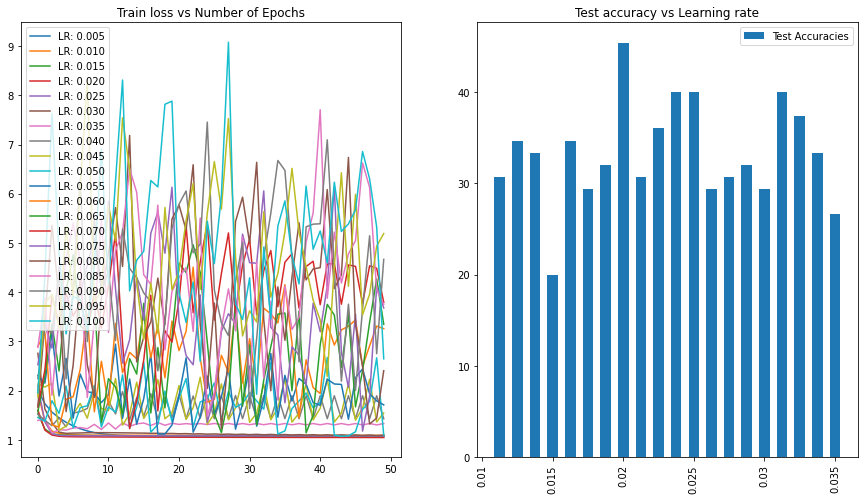

In [215]:
import matplotlib.pyplot as plt

f, a = plt.subplots(1, 2, figsize = (15, 8))
# plt.xticks()
epochs_list = [x for x in range(50)]
for i in range(20):
    a[0].plot(epochs_list, train_loss[i],  label=f'LR: {lr_list[i]:.3f}')
# a[0].set_xticklabels(epochs_list)
# a[0].set_xticks(epochs_list)

a[1].bar(lr_list, test_performance, width = 0.003, label='Test Accuracies')
a[1].set_xticklabels(lr_list, rotation = 'vertical')

a[0].title.set_text('Train loss vs Number of Epochs')
a[1].title.set_text('Test accuracy vs Learning rate')
a[0].legend()
a[1].legend()
plt.show()

In [216]:
train_loss = []
test_performance = []
epochs_list = []


for itr in range(10, 101, 10):
    y = iris['target'].tolist()
    Y = []
    for label in y:
        if label == 0:
            Y.append([1., 0., 0.])
        elif label == 1:
            Y.append([0., 1., 0.])
        elif label == 2:
            Y.append([0., 0., 1.])
        else:
            continue

    # Split the data set into training and testing
    X_train, X_test, Y_train, Y_test = train_test_splitter(X_scaled, Y, train_size=0.5)
    
    learning_rate = 0.015
    epochs_list.append(itr)
    training_epochs = itr
    model = Linear(4,3)
    train_loss.append(model.fit(X_train, Y_train, training_epochs, learning_rate))
    test_acc = model.predict(X_test, Y_test)
    print(f'Test Accuracy on 75 images of iris dataset with LR {learning_rate:.4f} and EPOCHS {training_epochs}: {test_acc:.4f}')
    test_performance.append(test_acc)

Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 10: 45.3333
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 20: 24.0000
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 30: 32.0000
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 40: 22.6667
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 50: 26.6667
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 60: 38.6667
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 70: 29.3333
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 80: 26.6667
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 90: 32.0000
Test Accuracy on 75 images of iris dataset with LR 0.0150 and EPOCHS 100: 32.0000


In [217]:
print(len(train_loss),len(train_loss[0]))
print(len(test_performance))

10 10
10


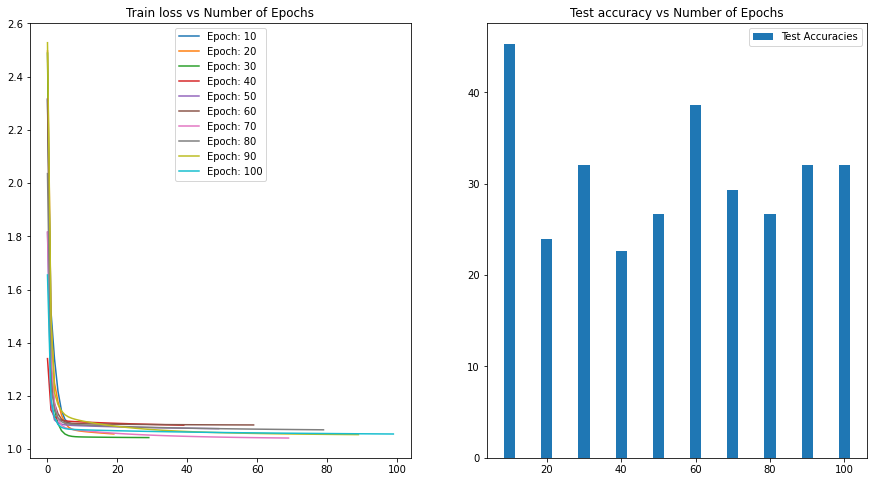

In [218]:
import matplotlib.pyplot as plt

f, a = plt.subplots(1, 2, figsize = (15, 8))
# plt.xticks()
for i in range(10):
    a[0].plot([x for x in range(epochs_list[i])], train_loss[i],  label=f'Epoch: {epochs_list[i]}')
# a[0].set_xticklabels(epochs_list)
# a[0].set_xticks(epochs_list)

a[1].bar(epochs_list, test_performance, width = 3, label='Test Accuracies')
# a[1].set_xticklabels(lr_list, rotation = 'vertical')

a[0].title.set_text('Train loss vs Number of Epochs')
a[1].title.set_text('Test accuracy vs Number of Epochs')
a[0].legend(loc='upper center')
a[1].legend()
plt.show()

In [219]:
M = 75
LR = 0.015
EPOCHS = 50
LAMBDA = 0.1
class Linear:
    def __init__(self, in_features: int, out_features: int, bias: bool = True):
        self.in_features = in_features  #4
        self.out_features = out_features    #3
        inner = [random(3) for x in range(out_features)]
        self.bias = [inner for x in range(M)]  #(75, 3)
        self.num_weights = (in_features, out_features)
        self.weights = [[random(3) for x in range(out_features)] for y in range(in_features)] #(4, 3)

    def fit(self, data: list, labels: list, epochs: int, lr: float, r: float):
        #data: shape(M, in_features) = (75, 4), N: Number of examples 
        #labels: shape(M,out_features) = (75, 3)
        #y: shape (75, 2)
        # y = [row[:-1] for row in labels]
        y = labels

        if len(data[0]) != self.in_features:
            raise Exception(f'Number of features should be equal to {self.in_features}')
        
        #loss per epoch
        train_loss = []

        for epoch in range(epochs):
            #forward pass
            L = matrix_sum(matrix_mul(data, self.weights), self.bias)
            prbs = softmax(L)
            # print(f'y: {len(y)} {len(y[0])} prbs: {len(prbs)} {len(prbs[0])}')
            update_prbs = update_probs(y, prbs)
            
            #save loss per epoch
            loss_per_example = cross_entropy_perceptron(labels, prbs)
            loss = sum(loss_per_example)/M
            train_loss.append(loss)
    
            #Gradient updates calculation
            zipped = zip(data, update_prbs)
            bias_zip = zip(self.bias)
            example, prob = next(zipped)
            temp = [[e * p for p in prob] for e in example]
            weight_update = matrix_difference(scalar_mult_mat(lr, temp), scalar_mult_mat(lr * r, self.weights))
            bias_update =  matrix_difference(scalar_mult_mat(lr, prob),\
                        scalar_mult_mat(lr * r, next(bias_zip)[0]))
            # print(f'len(weight_update): {len(weight_update)} {len(weight_update[0])}, len(bias_update): {len(bias_update)} type(bias_update[0]): {type(bias_update)}')
            # print(f'bias_update: {bias_update}')
            for example, prob in zipped:
                temp = [[e * p for p in prob] for e in example]
                weight_update = matrix_sum(weight_update, scalar_mult_mat(lr, temp))
                # print(f'len(scalar_mult_mat(lr, prob)): {len(scalar_mult_mat(lr, prob))}, len(bias_update): { len(bias_update)}')
                # print(f'itr: {itr} scalar_mult_mat(lr, prob): {scalar_mult_mat(lr, prob)} prob: {prob}, bias_update: {bias_update}')
                bias_update = matrix_sum(bias_update , scalar_mult_mat(lr, prob))
            weight_update_matrix =  scalar_mult_mat(1/M, weight_update)
            bias_update =  scalar_mult_mat(1/M, bias_update)
            bias_update_matrix = [bias_update for i in range(M)] 
            #backward pass
            self.weights = matrix_sum(self.weights, weight_update)
            self.bias = matrix_sum(self.bias, bias_update_matrix)

        #return loss per epoch
        return train_loss
            

    def predict(self, test_data: list, test_labels: list):
        L = matrix_sum(matrix_mul(test_data, self.weights), self.bias)
        prbs = softmax(L)
        preds = [row.index(max(row)) for row in prbs]
        correct = 0
        for label_row, p in zip(test_labels, preds):
            if label_row[p] == 1:
                correct += 1
        return correct/M*100
                    

model = Linear(4, 3)
model.fit(X_train, Y_train, EPOCHS, LR, LAMBDA)
print(f'Test Accuracy on 75 images of iris dataset with lr {LR} and EPOCHS {EPOCHS}: {model.predict(X_test, Y_test)}')

Test Accuracy on 75 images of iris dataset with lr 0.015 and EPOCHS 50: 38.666666666666664


In [220]:
train_loss = []
test_performance = []
lambda_list = []


for itr in range(50, 2001, 100):
    y = iris['target'].tolist()
    Y = []
    for label in y:
        if label == 0:
            Y.append([1., 0., 0.])
        elif label == 1:
            Y.append([0., 1., 0.])
        elif label == 2:
            Y.append([0., 0., 1.])
        else:
            continue

    # Split the data set into training and testing
    X_train, X_test, Y_train, Y_test = train_test_splitter(X_scaled, Y, train_size=0.5)

    r_value = 0.001 * itr
    lambda_list.append(round(r_value, 3))
    training_epochs = 50 
    model = Linear(4,3)
    train_loss.append(model.fit(X_train, Y_train, training_epochs, learning_rate, r_value))
    test_acc = model.predict(X_test, Y_test)
    print(f'Test Accuracy on 75 images of iris dataset with Lambda {r_value:.4f} and EPOCHS {training_epochs}: {test_acc:.4f}')
    test_performance.append(test_acc)

Test Accuracy on 75 images of iris dataset with Lambda 0.0500 and EPOCHS 50: 28.0000
Test Accuracy on 75 images of iris dataset with Lambda 0.1500 and EPOCHS 50: 24.0000
Test Accuracy on 75 images of iris dataset with Lambda 0.2500 and EPOCHS 50: 24.0000
Test Accuracy on 75 images of iris dataset with Lambda 0.3500 and EPOCHS 50: 46.6667
Test Accuracy on 75 images of iris dataset with Lambda 0.4500 and EPOCHS 50: 29.3333
Test Accuracy on 75 images of iris dataset with Lambda 0.5500 and EPOCHS 50: 33.3333
Test Accuracy on 75 images of iris dataset with Lambda 0.6500 and EPOCHS 50: 36.0000
Test Accuracy on 75 images of iris dataset with Lambda 0.7500 and EPOCHS 50: 33.3333
Test Accuracy on 75 images of iris dataset with Lambda 0.8500 and EPOCHS 50: 42.6667
Test Accuracy on 75 images of iris dataset with Lambda 0.9500 and EPOCHS 50: 28.0000
Test Accuracy on 75 images of iris dataset with Lambda 1.0500 and EPOCHS 50: 36.0000
Test Accuracy on 75 images of iris dataset with Lambda 1.1500 and

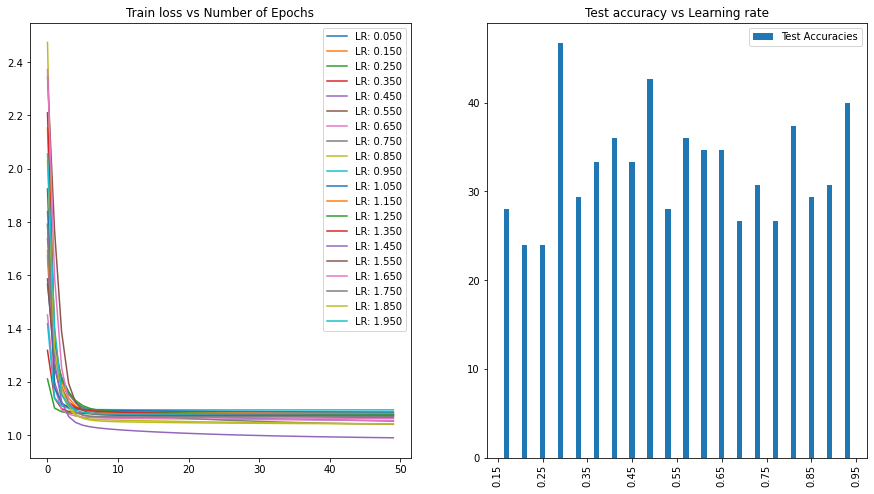

In [221]:
import matplotlib.pyplot as plt

f, a = plt.subplots(1, 2, figsize = (15, 8))
# plt.xticks()
epochs_list = [x for x in range(50)]
for i in range(20):
    a[0].plot(epochs_list, train_loss[i],  label=f'LR: {lambda_list[i]:.3f}')
# a[0].set_xticklabels(epochs_list)
# a[0].set_xticks(epochs_list)

a[1].bar(lambda_list, test_performance, width = 0.03, label='Test Accuracies')
a[1].set_xticklabels(lambda_list, rotation = 'vertical')

a[0].title.set_text('Train loss vs Number of Epochs')
a[1].title.set_text('Test accuracy vs Learning rate')
a[0].legend()
a[1].legend()
plt.show()

In [222]:
"""
References:
https://janakiev.com/blog/keras-iris/
https://realpython.com/python-zip-function/
https://www.geeksforgeeks.org/python-ways-to-shuffle-a-list/
https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
"""

'\nReferences:\nhttps://janakiev.com/blog/keras-iris/\nhttps://realpython.com/python-zip-function/\nhttps://www.geeksforgeeks.org/python-ways-to-shuffle-a-list/\nhttps://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling\n'

In [223]:
B = [[1,2,1],
     [2,3,4],
     [5,4,1]]

bias_zip = zip(B)
print(x, next(bias_zip)[0])
for i in next(bias_zip)[0]:
    print(i)

[[1, 2, 1]] [1, 2, 1]
2
3
4
